In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as  plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [82]:
# reading the merged file
df = pd.read_csv("../data/csv_files/at200.csv")

In [83]:
# there is no level elevation for all the data
del(df["Level: Elevation (m)"])

In [84]:
# data cleaning and converting the date time into timestamp
df = df.dropna()
df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)

In [85]:
# unique_stations = df["station_id"].unique()
# station_index = {}
# for index,station in enumerate(unique_stations):
#     station_index[station] = index
# station_index

In [86]:
# these replaces the respective station_id with their index based on above
# station_index dictionary
# df["station_id"] = df["station_id"].replace(station_index)
# df.size

In [87]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
station_id_encoded = encoder.fit_transform(df[['station_id']])
station_id_encoded_df = pd.DataFrame(station_id_encoded, columns=[f'station_id_{i}' for i in range(station_id_encoded.shape[1])])

# Drop the original 'station_id' column and append the one-hot encoded columns
df = df.drop('station_id', axis=1)
df = pd.concat([df.reset_index(drop=True), station_id_encoded_df.reset_index(drop=True)], axis=1)
df.head()

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),ORP (mV),...,easting,northing,station_id_0,station_id_1,station_id_2,station_id_3,station_id_4,station_id_5,station_id_6,station_id_7
0,1.673469e+12,161.135101,169.814270,0.089782,6205.972656,0.998789,110.379279,6.345863,33.323765,242.252640,...,1383303.353,3875869.513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.673470e+12,161.549484,169.920212,0.089823,6190.053711,0.998772,110.448137,6.392928,30.763149,241.012863,...,1383303.353,3875869.513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.673503e+12,160.563217,167.590134,0.088505,6228.076660,0.998702,108.933590,6.545794,22.439957,233.128357,...,1383303.353,3875869.513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.673590e+12,160.465378,167.549561,0.088486,6231.874023,0.998705,108.907215,6.533609,23.105145,233.137894,...,1383303.353,3875869.513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.673676e+12,160.041122,167.145935,0.088271,6248.394043,0.998707,108.644858,6.524963,23.577213,230.408005,...,1383303.353,3875869.513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
df2 = df.copy()
scaler = StandardScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])
df2.head()

,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),ORP (mV),...,easting,northing,station_id_0,station_id_1,station_id_2,station_id_3,station_id_4,station_id_5,station_id_6,station_id_7
0,-1.215493,-0.913644,-0.866235,-0.864923,0.779062,2.392476,-0.866235,1.435516,-1.375502,-0.918910,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
1,-1.215461,-0.911425,-0.865695,-0.864523,0.772683,2.278988,-0.865695,1.473938,-1.411716,-0.929497,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
2,-1.211881,-0.916707,-0.877567,-0.877127,0.787919,1.815217,-0.877567,1.598730,-1.529430,-0.996829,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
3,-1.202692,-0.917231,-0.877773,-0.877308,0.789441,1.837600,-0.877774,1.588783,-1.520023,-0.996748,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
4,-1.193503,-0.919503,-0.879830,-0.879372,0.796061,1.850559,-0.879830,1.581725,-1.513346,-1.020061,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225


In [89]:
# downsampling the data
down_sample = df2.iloc[::10, :]
down_sample.size
# downsampling is getting loss
# works good for visualization

109732

In [90]:
down_sample.head()

,Date Time,Actual Conductivity (ÂµS/cm),Specific Conductivity (ÂµS/cm),Salinity (psu),Resistivity (â„¦-cm),Density (g/cmÂ³),Total Dissolved Solids (mg/L),pH (pH),pH MV (mV),ORP (mV),...,easting,northing,station_id_0,station_id_1,station_id_2,station_id_3,station_id_4,station_id_5,station_id_6,station_id_7
0,-1.215493,-0.913644,-0.866235,-0.864923,0.779062,2.392476,-0.866235,1.435516,-1.375502,-0.918910,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
10,-1.138367,-0.921480,-0.879858,-0.879228,0.801850,1.987217,-0.879858,1.576854,-1.508862,-1.054409,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
20,-1.046474,-0.929841,-0.884156,-0.883223,0.826630,2.266814,-0.884156,1.516151,-1.451674,-1.012507,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
30,-0.954580,-0.967181,-0.917908,-0.917075,0.943548,2.507143,-0.917908,1.429103,-1.369634,-0.996850,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225
40,-0.862687,-1.006726,-0.956655,-0.956207,1.079731,2.560156,-0.956655,1.386457,-1.329407,-1.053615,...,0.709496,-0.896998,-0.481126,5.151534,-0.316742,-0.528354,-0.340998,-0.341045,-0.293657,-0.466225


In [91]:
X = df2.values

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
test_dataset = TensorDataset(X_test_tensor, X_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [92]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        #encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 25),  # First hidden layer with 25 neurons
            nn.ReLU(),
            nn.Linear(25, 18),        # Second hidden layer with 18 neurons
            nn.ReLU(),
            nn.Linear(18, 12),         # Third hidden layer with 12 neurons
            nn.ReLU(),
            nn.Linear(12, 8),         # Bottleneck layer with 8 neurons
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(8, 12),         # Mirror of the third hidden layer
            nn.ReLU(),
            nn.Linear(12, 18),         # Mirror of the second hidden layer
            nn.ReLU(),
            nn.Linear(18, 25),        # Mirror of the first hidden layer
            nn.ReLU(),
            nn.Linear(25, input_dim), # Output layer
            nn.Sigmoid()               # to Ensure the output values are between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [93]:
input_dim = X_train.shape[1]
model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [94]:
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data in train_loader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, _ = data
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            val_loss += loss.item()
    
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f}')

Epoch [1/100], Loss: 0.8900 Validation Loss: 0.8115
Epoch [2/100], Loss: 0.8037 Validation Loss: 0.8065
Epoch [3/100], Loss: 0.8023 Validation Loss: 0.8061
Epoch [4/100], Loss: 0.8129 Validation Loss: 0.8235
Epoch [5/100], Loss: 0.8170 Validation Loss: 0.8072
Epoch [6/100], Loss: 0.8042 Validation Loss: 0.8064
Epoch [7/100], Loss: 0.7969 Validation Loss: 0.7907
Epoch [8/100], Loss: 0.7873 Validation Loss: 0.7892
Epoch [9/100], Loss: 0.7877 Validation Loss: 0.7936
Epoch [10/100], Loss: 0.7909 Validation Loss: 0.7935
Epoch [11/100], Loss: 0.7889 Validation Loss: 0.7884
Epoch [12/100], Loss: 0.7829 Validation Loss: 0.7785
Epoch [13/100], Loss: 0.7767 Validation Loss: 0.7784
Epoch [14/100], Loss: 0.7767 Validation Loss: 0.7784
Epoch [15/100], Loss: 0.7726 Validation Loss: 0.7740
Epoch [16/100], Loss: 0.7720 Validation Loss: 0.7739
Epoch [17/100], Loss: 0.7689 Validation Loss: 0.7694
Epoch [18/100], Loss: 0.7661 Validation Loss: 0.7659
Epoch [19/100], Loss: 0.7635 Validation Loss: 0.7658
Ep

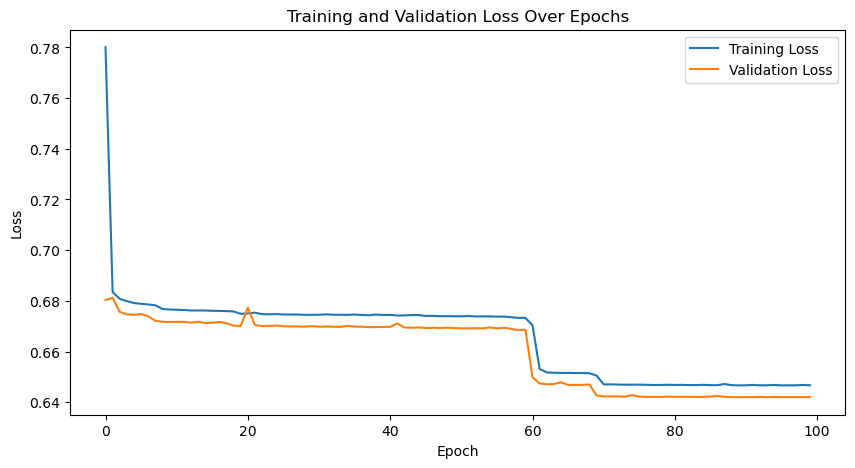

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()